In [108]:
import pandas as pd
import numpy as np

In [109]:
# load user data
users_path = '../../city_filter/users_Indianapolis.csv'
users_df = pd.read_csv(users_path, sep=',')
users_df

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,NaN,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,0,0,0,0,0,1,0,0,0,0
1,E9kcWJdJUHuTKfQurPljwA,Mike,358,2008-12-11 22:11:56,399,102,143,NaN,"y2GyxJF5VQWohxgw_GR7Jw, 0NRn4eY3JWN0IFqvOSa5gA...",23,...,7,2,0,0,8,6,12,12,5,0
2,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,167,206,395,130,915,3396,1915,1915,696,470
3,XLs_PhrJ7Qwn_RfgMM7Djw,Weili,90,2009-07-12 14:34:54,71,21,19,NaN,"gTX68_Us2eI2KjY21aOQ7g, e4nHt3ErihX7II-MHXVM1w...",1,...,0,0,0,0,1,3,0,0,0,0
4,AkBtT43dYcttxQ3qOzPBAg,Sherri,1034,2007-02-20 18:21:07,3066,1485,2235,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2016","Hg1EF9PjGfcKBSNMjvWBeQ, PcPminF0bIUsKjUh9e4DMQ...",114,...,26,24,83,23,229,570,528,528,118,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104842,V1pK2h2TRKOxE_vpEzgzlA,Steve,3,2017-01-24 02:04:36,1,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
104843,94F3B7_NA78yraWjFin99Q,Trace,7,2013-05-06 18:39:35,1,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
104844,QxeOXly_k0fTIamU2sb0nw,Rich,7,2012-01-12 16:24:56,2,6,0,NaN,NaN,0,...,0,0,0,0,1,0,0,0,0,0
104845,uyKAXuFGumalDTwdm3sp5g,Tera,3,2016-07-03 00:31:19,0,0,0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 假设 users_df 已加载

# Step 1: 复制数据避免污染原始
users_quality_df = users_df.copy()

# Step 2: 账号年龄
users_quality_df['yelping_since'] = pd.to_datetime(users_quality_df['yelping_since'], errors='coerce')
users_quality_df['account_age_days'] = (pd.Timestamp.now() - users_quality_df['yelping_since']).dt.days

# Step 3: elite 用户标记
users_quality_df['elite_flag'] = users_quality_df['elite'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)

# Step 4: compliment 总数
compliment_cols = [col for col in users_df.columns if col.startswith('compliment_')]
users_quality_df['compliment_sum'] = users_quality_df[compliment_cols].sum(axis=1)

# Step 5: 对指定列做 log1p 转换
log_cols = ['review_count', 'useful', 'fans', 'compliment_sum', 'account_age_days']
for col in log_cols:
    users_quality_df[f'{col}_log'] = np.log1p(users_quality_df[col])

# Step 6: 对 log 后的列做 Z-score 标准化
scaler = StandardScaler()
log_z_cols = [f'{col}_log' for col in log_cols]
users_quality_df[[f'{col}_z' for col in log_z_cols]] = scaler.fit_transform(users_quality_df[log_z_cols])

# Step 7: 计算最终用户质量得分（加权可调）
users_quality_df['user_quality_score'] = (
    0.2 * users_quality_df['review_count_log_z'] +
    0.2 * users_quality_df['useful_log_z'] +
    0.1 * users_quality_df['fans_log_z'] +
    0.1 * users_quality_df['elite_flag'] +
    0.2 * users_quality_df['compliment_sum_log_z'] +
    0.2 * users_quality_df['account_age_days_log_z']
)


In [111]:
users_quality_df

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,useful_log,fans_log,compliment_sum_log,account_age_days_log,review_count_log_z,useful_log_z,fans_log_z,compliment_sum_log_z,account_age_days_log_z,user_quality_score
0,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,NaN,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,1.945910,0.693147,0.693147,8.681351,0.235621,0.097853,0.437561,-0.073385,1.505624,0.396899
1,E9kcWJdJUHuTKfQurPljwA,Mike,358,2008-12-11 22:11:56,399,102,143,NaN,"y2GyxJF5VQWohxgw_GR7Jw, 0NRn4eY3JWN0IFqvOSa5gA...",23,...,5.991465,3.178054,4.043051,8.693832,2.657130,2.465529,3.579568,2.546983,1.543553,2.200596
2,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,9.760310,6.720220,9.424080,8.747193,3.836847,4.671260,8.058413,6.756142,1.705709,4.299833
3,XLs_PhrJ7Qwn_RfgMM7Djw,Weili,90,2009-07-12 14:34:54,71,21,19,NaN,"gTX68_Us2eI2KjY21aOQ7g, e4nHt3ErihX7II-MHXVM1w...",1,...,4.276666,0.693147,1.609438,8.657651,1.655605,1.461937,0.437561,0.643357,1.433603,1.082657
4,AkBtT43dYcttxQ3qOzPBAg,Sherri,1034,2007-02-20 18:21:07,3066,1485,2235,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2016","Hg1EF9PjGfcKBSNMjvWBeQ, PcPminF0bIUsKjUh9e4DMQ...",114,...,8.028455,4.744932,7.852828,8.798907,3.429790,3.657686,5.560786,5.527074,1.862861,3.551561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104842,V1pK2h2TRKOxE_vpEzgzlA,Steve,3,2017-01-24 02:04:36,1,0,0,NaN,NaN,0,...,0.693147,0.000000,0.000000,8.006701,-0.624476,-0.635332,-0.438879,-0.615580,-0.544534,-0.527872
104843,94F3B7_NA78yraWjFin99Q,Trace,7,2013-05-06 18:39:35,1,0,0,NaN,NaN,0,...,0.693147,0.000000,0.000000,8.380227,-0.118667,-0.635332,-0.438879,-0.615580,0.590556,-0.199693
104844,QxeOXly_k0fTIamU2sb0nw,Rich,7,2012-01-12 16:24:56,2,6,0,NaN,NaN,0,...,1.098612,0.000000,0.693147,8.484670,-0.118667,-0.398032,-0.438879,-0.073385,0.907941,0.019683
104845,uyKAXuFGumalDTwdm3sp5g,Tera,3,2016-07-03 00:31:19,0,0,0,NaN,NaN,0,...,0.000000,0.000000,0.000000,8.072779,-0.624476,-1.040999,-0.438879,-0.615580,-0.343732,-0.568845


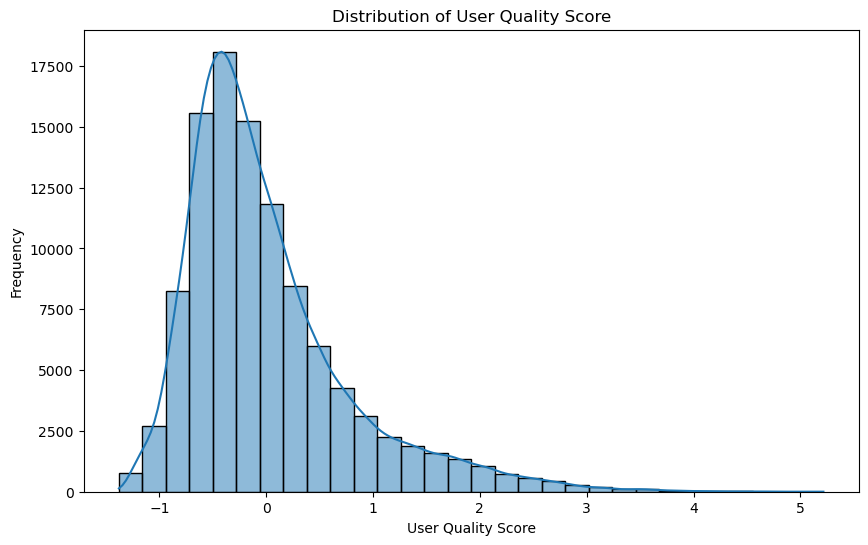

In [112]:
# 可视化user_quality_score 的分布
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(users_quality_df['user_quality_score'], bins=30, kde=True)
plt.title('Distribution of User Quality Score')
plt.xlabel('User Quality Score')
plt.ylabel('Frequency')
plt.show()

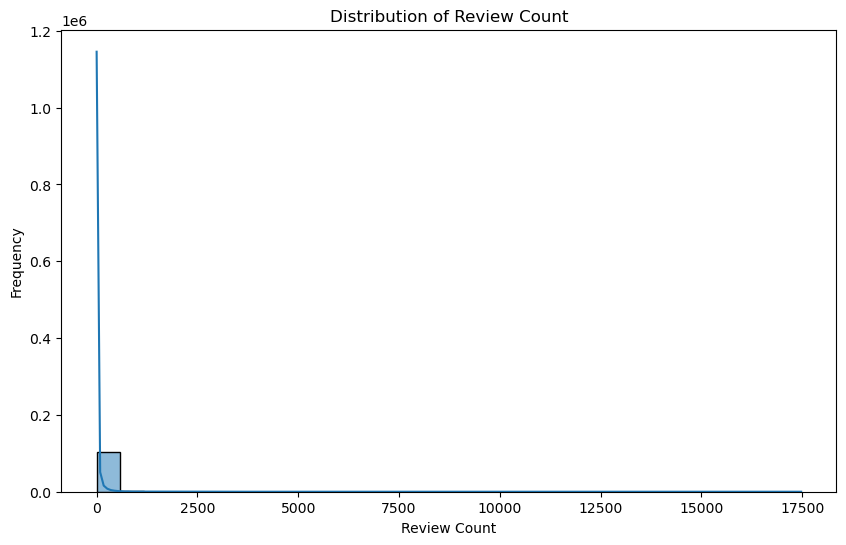

In [113]:
# 可视化review_count的分布
plt.figure(figsize=(10, 6))
sns.histplot(users_quality_df['review_count'], bins=30, kde=True)
plt.title('Distribution of Review Count')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()


In [114]:
threshold = users_quality_df['user_quality_score'].quantile(0.90)
users_quality_df['user_quality_weight'] = users_quality_df['user_quality_score'].apply(
    lambda x: 1.5 if x >= threshold else 1.0
)
users_quality_df

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,fans_log,compliment_sum_log,account_age_days_log,review_count_log_z,useful_log_z,fans_log_z,compliment_sum_log_z,account_age_days_log_z,user_quality_score,user_quality_weight
0,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,NaN,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,0.693147,0.693147,8.681351,0.235621,0.097853,0.437561,-0.073385,1.505624,0.396899,1.0
1,E9kcWJdJUHuTKfQurPljwA,Mike,358,2008-12-11 22:11:56,399,102,143,NaN,"y2GyxJF5VQWohxgw_GR7Jw, 0NRn4eY3JWN0IFqvOSa5gA...",23,...,3.178054,4.043051,8.693832,2.657130,2.465529,3.579568,2.546983,1.543553,2.200596,1.5
2,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,6.720220,9.424080,8.747193,3.836847,4.671260,8.058413,6.756142,1.705709,4.299833,1.5
3,XLs_PhrJ7Qwn_RfgMM7Djw,Weili,90,2009-07-12 14:34:54,71,21,19,NaN,"gTX68_Us2eI2KjY21aOQ7g, e4nHt3ErihX7II-MHXVM1w...",1,...,0.693147,1.609438,8.657651,1.655605,1.461937,0.437561,0.643357,1.433603,1.082657,1.5
4,AkBtT43dYcttxQ3qOzPBAg,Sherri,1034,2007-02-20 18:21:07,3066,1485,2235,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2016","Hg1EF9PjGfcKBSNMjvWBeQ, PcPminF0bIUsKjUh9e4DMQ...",114,...,4.744932,7.852828,8.798907,3.429790,3.657686,5.560786,5.527074,1.862861,3.551561,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104842,V1pK2h2TRKOxE_vpEzgzlA,Steve,3,2017-01-24 02:04:36,1,0,0,NaN,NaN,0,...,0.000000,0.000000,8.006701,-0.624476,-0.635332,-0.438879,-0.615580,-0.544534,-0.527872,1.0
104843,94F3B7_NA78yraWjFin99Q,Trace,7,2013-05-06 18:39:35,1,0,0,NaN,NaN,0,...,0.000000,0.000000,8.380227,-0.118667,-0.635332,-0.438879,-0.615580,0.590556,-0.199693,1.0
104844,QxeOXly_k0fTIamU2sb0nw,Rich,7,2012-01-12 16:24:56,2,6,0,NaN,NaN,0,...,0.000000,0.693147,8.484670,-0.118667,-0.398032,-0.438879,-0.073385,0.907941,0.019683,1.0
104845,uyKAXuFGumalDTwdm3sp5g,Tera,3,2016-07-03 00:31:19,0,0,0,NaN,NaN,0,...,0.000000,0.000000,8.072779,-0.624476,-1.040999,-0.438879,-0.615580,-0.343732,-0.568845,1.0


In [115]:
reviews_path = "../../sentiment_analysis/reviews_Indianapolis_analyzed.csv"
reviews_df = pd.read_csv(reviews_path, encoding='utf-8')
# 添加sentiment_score
sentiment_map = {
    'Very Negative': -2,
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1,
    'Very Positive': 2
}
reviews_df['sentiment_score'] = reviews_df['text'].map(sentiment_map)

reviews_df['interact_score'] = reviews_df["interact_score"] = (
    reviews_df["useful"] + 0.5 * reviews_df["funny"] + 0.2 * reviews_df["cool"]
)

reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment_score,interact_score
0,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4.0,0,0,0,Very Positive,2015-08-19 14:31:45,2,0.0
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,Positive,2018-07-17 03:30:07,1,1.2
2,EoN2xyKvTTn9B-z1grhYxw,DBYhpb5hrAYgQjQaMhNYyQ,oJ4ik-4PZe6gexxW-tSmsw,4.0,0,0,0,Neutral,2016-10-26 15:29:56,0,0.0
3,Ti6y48ya3syOndm7teSjcg,NGTzj_44YDnPDmsD45HWeg,O8BBn8lry8lLoIFmChceGg,5.0,0,0,0,Positive,2014-08-10 23:56:17,1,0.0
4,940tqxFO4Pwg_KMg4Y4Z5g,O6wkgoJqU7KMjleSlCDGaA,EQ-TZ2eeD_E0BHuvoaeG5Q,5.0,2,0,1,Positive,2018-01-10 01:48:58,1,2.2


In [116]:
raw_review_features_path = "../review_features_engineering/business_review_Indianapolis_features.csv"
raw_review_features_df = pd.read_csv(raw_review_features_path, encoding='utf-8')    
raw_review_features_df

,business_id,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,long_review_ratio,avg_review_length_scaled,avg_word_count_scaled,avg_useful_scaled,avg_funny_scaled,avg_cool_scaled,interact_score_mean_scaled,sentiment_score_mean_scaled,first_review_date,last_review_date,recent_review_ratio,review_timespan_days_scaled,review_density_per_day_scaled,review_burst_score_scaled
0,il_Ro8jwPlHresjw9EGmBg,2.413793,0.776556,0.448276,0.379310,0.172414,0.517241,-0.845744,-0.836647,-0.647298,-0.264359,0.136424,-0.580540,-0.771422,2014-03-16 13:59:31,2021-04-22 13:58:42,0.137931,-0.097365,-0.223259,-0.127174
1,qhDdDeI3K4jy2KyzwFN53w,4.052632,-0.294102,0.605263,0.078947,0.315789,0.763158,0.234320,0.264466,0.767032,1.419685,1.782698,1.002346,0.285336,2010-08-28 18:02:30,2021-08-23 00:49:43,0.052632,0.949868,-0.250645,-0.149158
2,kfNv-JZpuN6TVNSO6hHdkw,3.950000,0.515631,0.750000,0.100000,0.150000,0.650000,-0.749391,-0.637307,-0.134506,-0.657974,-0.590205,-0.256992,0.440368,2021-02-18 04:17:26,2021-12-29 07:35:13,1.000000,-1.779285,0.614326,1.585918
3,x1mhq4IpWctQOBM06dU8vg,1.600000,0.036412,0.280000,0.600000,0.120000,0.840000,1.054853,1.070082,1.797385,-0.342097,-0.952039,1.540230,-1.765421,2016-03-18 19:09:27,2022-01-10 22:12:38,0.120000,-0.443491,-0.213892,-0.125364
4,seKihQKpGGnCeLuELRQPSQ,3.333333,0.525084,0.518519,0.211111,0.270370,0.533333,-0.087645,-0.054476,-0.580796,0.470300,-0.374531,-0.453505,-0.115265,2014-12-12 01:45:47,2022-01-18 20:36:24,0.111111,-0.096627,1.263649,-0.132857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,3.346939,0.496569,0.428571,0.265306,0.306122,0.612245,-0.316529,-0.261255,-0.684418,-0.331407,-0.141861,-0.656948,-0.332735,2008-07-26 17:21:01,2021-12-10 16:33:45,0.061224,1.593410,-0.241655,-0.149477
5331,AM7O0cwkxm6w_e0Q7-f9FQ,3.866667,0.558162,0.633333,0.233333,0.133333,0.566667,-0.592772,-0.563551,-0.522269,0.129683,-0.496110,-0.475489,0.326197,2018-04-15 13:56:50,2022-01-15 19:57:45,0.200000,-0.999211,-0.052160,-0.076353
5332,Gi1QPLu_y8rLS3uTN9Z_VA,3.083333,1.526495,0.500000,0.500000,0.000000,0.750000,1.078136,1.059634,1.568845,1.087734,-1.216343,1.441922,-0.610008,2012-08-09 21:59:14,2021-10-26 20:15:17,0.166667,0.471639,-0.345161,-0.129173
5333,fn3ybdsRSrIDpKZTsRuAWg,4.083333,0.853708,0.750000,0.250000,0.000000,0.583333,-0.249243,-0.350485,-0.628546,-0.896772,0.176126,-0.657937,0.531705,2013-02-14 23:05:40,2020-11-17 19:24:03,0.000000,0.079019,-0.334439,-0.156356


In [117]:
# 计算加权特征
reviews_df = reviews_df.merge(
    users_quality_df[['user_id', 'user_quality_weight']],
    on='user_id', how='left'
)
reviews_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment_score,interact_score,user_quality_weight
0,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4.0,0,0,0,Very Positive,2015-08-19 14:31:45,2,0.0,1.0
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,Positive,2018-07-17 03:30:07,1,1.2,1.5
2,EoN2xyKvTTn9B-z1grhYxw,DBYhpb5hrAYgQjQaMhNYyQ,oJ4ik-4PZe6gexxW-tSmsw,4.0,0,0,0,Neutral,2016-10-26 15:29:56,0,0.0,1.5
3,Ti6y48ya3syOndm7teSjcg,NGTzj_44YDnPDmsD45HWeg,O8BBn8lry8lLoIFmChceGg,5.0,0,0,0,Positive,2014-08-10 23:56:17,1,0.0,1.0
4,940tqxFO4Pwg_KMg4Y4Z5g,O6wkgoJqU7KMjleSlCDGaA,EQ-TZ2eeD_E0BHuvoaeG5Q,5.0,2,0,1,Positive,2018-01-10 01:48:58,1,2.2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...
361621,FeghE6yk5hmgGFYYqkr5-Q,HiRGRdbSbR7btUmWuZ4_IQ,-5UQGwUZWUhPi5pJlcwEYA,4.0,2,0,0,Positive,2016-11-05 20:28:20,1,2.0,1.5
361622,ByNV9k4ZUTjnzQOh7S-TMw,K37EM2POKtBRUum7M_d5hA,3CGXa85uNgvp8Berx5AhQQ,5.0,1,0,0,Very Positive,2020-03-10 04:52:29,2,1.0,1.5
361623,MIXdpbbCTRAVdi8RiMjwdg,s67G457QlHSvk5RjOMN91w,58MJvmfo5hyfBbvkr54sFA,5.0,1,0,0,Very Positive,2022-01-18 15:24:44,2,1.0,1.0
361624,zHZ-A1qyKDEgyZMDaD--wg,_XVdmFWSgTN6YlojUxixTA,6WaI-IN8ql0xpEKlb4q8tg,5.0,1,0,0,Very Positive,2022-01-17 20:59:01,2,1.0,1.0


In [118]:
from sklearn.preprocessing import StandardScaler
def weight_calculate(col, is_Scaled=False):    
    review_weighted_stats = reviews_df.groupby('business_id').apply(
        lambda x: (x[col] * x['user_quality_weight']).sum() / x['user_quality_weight'].sum())

    review_weighted_stats = review_weighted_stats.reset_index()
    review_weighted_stats.columns = ['business_id', f'weighted_{col}']
    # 标准化
    if is_Scaled:
        scaler = StandardScaler()
        review_weighted_stats[f'weighted_{col}'] = scaler.fit_transform(review_weighted_stats[[f'weighted_{col}']])
        review_weighted_stats.columns = ['business_id', f'weighted_{col}_scaled']
        
    return review_weighted_stats
       


In [119]:
cols_scaled = {
    'stars': False,
    'sentiment_score': True,
    'useful': True,
    'funny': True,
    'cool': True,
    'interact_score': True,
}
# 计算加权特征
for key, value in cols_scaled.items():
    raw_review_features_df = raw_review_features_df.merge(
        weight_calculate(key, value),
        on='business_id', how='left'
    )

# 计算std_weighted_stars_scaled
raw_review_features_df['std_weighted_stars_scaled'] = raw_review_features_df['weighted_stars'].transform(
    lambda x: (x - x.mean()) / x.std()
)

raw_review_features_df

/tmp/ipykernel_86004/691788211.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_weighted_stats = reviews_df.groupby('business_id').apply(
/tmp/ipykernel_86004/691788211.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_weighted_stats = reviews_df.groupby('business_id').apply(
/tmp/ipykernel_86004/691788211.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. 

,business_id,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,long_review_ratio,avg_review_length_scaled,avg_word_count_scaled,avg_useful_scaled,...,review_timespan_days_scaled,review_density_per_day_scaled,review_burst_score_scaled,weighted_stars,weighted_sentiment_score_scaled,weighted_useful_scaled,weighted_funny_scaled,weighted_cool_scaled,weighted_interact_score_scaled,std_weighted_stars_scaled
0,il_Ro8jwPlHresjw9EGmBg,2.413793,0.776556,0.448276,0.379310,0.172414,0.517241,-0.845744,-0.836647,-0.647298,...,-0.097365,-0.223259,-0.127174,2.500000,-0.699245,-0.510099,-0.258882,0.063678,-0.468453,-1.195120
1,qhDdDeI3K4jy2KyzwFN53w,4.052632,-0.294102,0.605263,0.078947,0.315789,0.763158,0.234320,0.264466,0.767032,...,0.949868,-0.250645,-0.149158,4.058824,0.328152,0.469420,0.674767,1.388706,0.658754,0.434372
2,kfNv-JZpuN6TVNSO6hHdkw,3.950000,0.515631,0.750000,0.100000,0.150000,0.650000,-0.749391,-0.637307,-0.134506,...,-1.779285,0.614326,1.585918,3.952381,0.437225,-0.353239,-0.402889,-0.519695,-0.423690,0.323104
3,x1mhq4IpWctQOBM06dU8vg,1.600000,0.036412,0.280000,0.600000,0.120000,0.840000,1.054853,1.070082,1.797385,...,-0.443491,-0.213892,-0.125364,1.666667,-1.703331,1.387820,-0.279020,-0.624265,1.035789,-2.066232
4,seKihQKpGGnCeLuELRQPSQ,3.333333,0.525084,0.518519,0.211111,0.270370,0.533333,-0.087645,-0.054476,-0.580796,...,-0.096627,1.263649,-0.132857,3.374194,-0.046523,-0.522350,0.143387,-0.330016,-0.437382,-0.281295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,3.346939,0.496569,0.428571,0.265306,0.306122,0.612245,-0.316529,-0.261255,-0.684418,...,1.593410,-0.241655,-0.149477,3.393443,-0.322710,-0.568340,-0.240642,-0.192963,-0.538226,-0.261174
5331,AM7O0cwkxm6w_e0Q7-f9FQ,3.866667,0.558162,0.633333,0.233333,0.133333,0.566667,-0.592772,-0.563551,-0.522269,...,-0.999211,-0.052160,-0.076353,3.915493,0.414373,-0.523328,-0.113421,-0.408950,-0.496747,0.284544
5332,Gi1QPLu_y8rLS3uTN9Z_VA,3.083333,1.526495,0.500000,0.500000,0.000000,0.750000,1.078136,1.059634,1.568845,...,0.471639,-0.345161,-0.129173,3.160000,-0.499166,1.219695,0.361925,-0.793185,1.006670,-0.505199
5333,fn3ybdsRSrIDpKZTsRuAWg,4.083333,0.853708,0.750000,0.250000,0.000000,0.583333,-0.249243,-0.350485,-0.628546,...,0.079019,-0.334439,-0.156356,4.038462,0.401566,-0.560359,-0.487119,0.035175,-0.558145,0.413087


In [121]:
print(raw_review_features_df.columns)

Index(['business_id', 'avg_review_stars', 'std_review_stars_scaled',
       'pos_review_ratio', 'neg_review_ratio', 'neu_review_ratio',
       'long_review_ratio', 'avg_review_length_scaled',
       'avg_word_count_scaled', 'avg_useful_scaled', 'avg_funny_scaled',
       'avg_cool_scaled', 'interact_score_mean_scaled',
       'sentiment_score_mean_scaled', 'first_review_date', 'last_review_date',
       'recent_review_ratio', 'review_timespan_days_scaled',
       'review_density_per_day_scaled', 'review_burst_score_scaled',
       'weighted_stars', 'weighted_sentiment_score_scaled',
       'weighted_useful_scaled', 'weighted_funny_scaled',
       'weighted_cool_scaled', 'weighted_interact_score_scaled',
       'std_weighted_stars_scaled'],
      dtype='object')


In [122]:
raw_review_features_df.to_csv(
    'business_review_Indianapolis_features_weighted.csv',
    index=False,
    encoding='utf-8'
)